## MNIST Data Classification

In [1]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

#### Loading Mnist Dataset from keras.dataset

In [3]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
print("Training data shape:", X_train.shape, Y_train.shape, "\nTest data shape:", X_test.shape, Y_test.shape)   #60000 data with 28x28 size image
#gray scale image=1 channel

Training data shape: (60000, 28, 28) (60000,) 
Test data shape: (10000, 28, 28) (10000,)


In [6]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape) # shape of Train data

(28, 28)


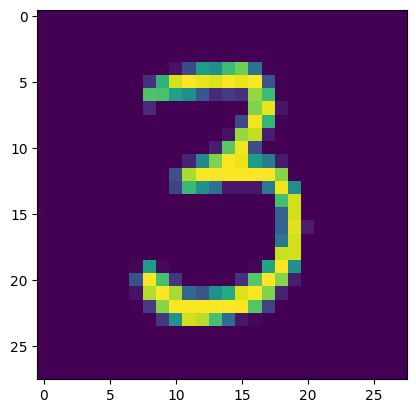

3


In [9]:
# displaying the image to check the dimension and values
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

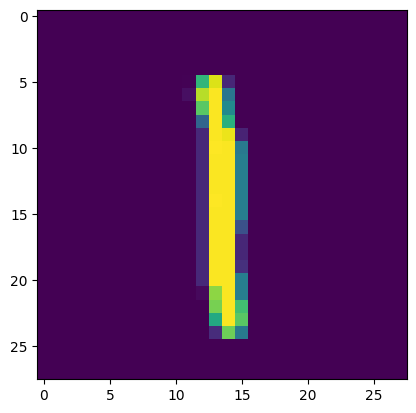

1


In [46]:
# displaying the image to check the dimension and values
plt.imshow(X_train[14])
plt.show()

# print the corresponding label
print(Y_train[14])

### Image Labels

In [14]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


 Since all the images have same dimension in this dataset, so we don't need to resize the dimension of images

In [47]:
# Scaling or normalising the values

X_train=X_train/255  # maximum value is 255
X_test= X_test/255

In [16]:
# now just check the 10th value of X_train
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Now we can see that all the values are between 0 and 1

## Building the Neural Network

In [17]:
# setting up the layers of neyral network

model=keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')
])

In [18]:
# Compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the neural network

model.fit(X_train, Y_train,epochs=10)                  # epochs: how many times the neural network go through the dataset

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.2982 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1391 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0827 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0596 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0520 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0444 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0414 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

Accuracy on Training data = 98.86 %

### Accuracy on Test Data

In [20]:
loss,accuracy=model.evaluate(X_test,Y_test)
print("Accuracy on Test Data: ", accuracy)
print("Loss: ", loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.1020 - accuracy: 0.9739
Accuracy on Test Data:  0.9739000201225281
Loss:  0.10204192996025085


* Test data accuracy = 97.390 %
* Thus our model is not overfitting

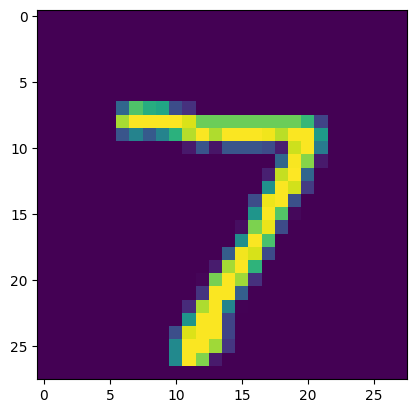

In [21]:
# first data point in X-test
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [25]:
print(Y_pred[0])  # gives the probability distribtion of each classes for first data point

[6.8263193e-06 4.4341227e-03 4.8914418e-01 9.4882381e-01 1.1869752e-10
 2.0514736e-01 4.2986567e-13 9.9974722e-01 4.0193435e-02 2.0482852e-01]


In [26]:
# converting the prediction probabilities to class label
label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


Now we will do this for all the values so that we can get the label values

In [27]:
# converting the prediction probabilities to class labels for all the  tes data points

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

* Y_test --> True Labels
* Y_pred_labels  --> Predicted Labels

## Confusion Matrix

In [28]:
conf_mat=confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

[[ 970    0    1    1    0    1    3    1    3    0]
 [   0 1119    3    2    0    1    2    0    8    0]
 [   4    1 1010    4    3    0    3    3    4    0]
 [   1    0    5  977    1   15    0    4    5    2]
 [   0    1    6    0  965    0    1    1    1    7]
 [   3    0    0    9    1  864    9    0    4    2]
 [   2    1    3    2    7    5  936    0    2    0]
 [   1    5   10    5    0    0    0  993    5    9]
 [   3    0    8    7    4    5    2    3  939    3]
 [   3    4    0    5   19    4    0    3    6  965]]


### Heat Map

Text(83.22222222222221, 0.5, 'True Labels')

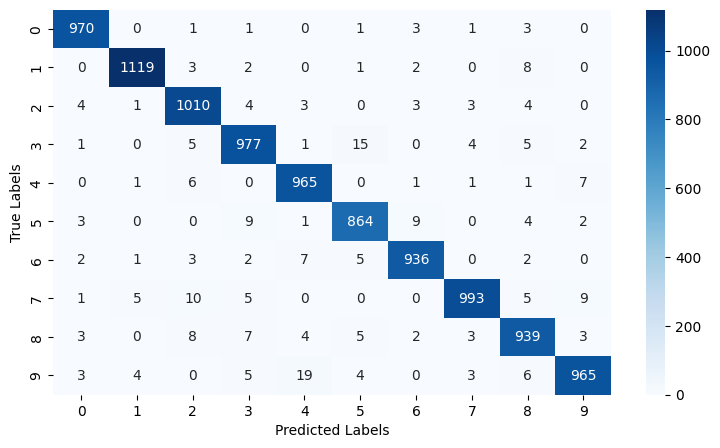

In [29]:
plt.figure(figsize=(9,5))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

## Building a Predictive System

1/1 [==============================] - 1s 764ms/step
The handwritten digit is recognized as: 8


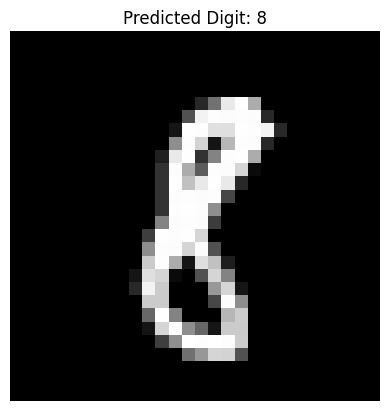

In [ ]:
input_image_path = '10041.png'

# Load and process image
input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resized = cv2.resize(grayscale, (28, 28))
input_image_resized = input_image_resized / 255.0

# Prepare image for model
image_reshape = np.reshape(input_image_resized, [1, 28, 28, 1])

# Predict using your trained model
input_prediction = model.predict(image_reshape)
input_pred_label = np.argmax(input_prediction)

# Print prediction
print("The handwritten digit is recognized as:", input_pred_label)

# Show the image with prediction
plt.imshow(input_image_resized, cmap='gray')
plt.title(f"Predicted Digit: {input_pred_label}")
plt.axis('off')
plt.show()